In [388]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.svm import SVC

In [79]:
# Reading the dataset
df = pd.read_csv("data-set.csv")
df

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,id_170,2930,0.000010,241.736477,176.115957,1839,6439,0.253347,0.174663,208.926217,...,0.119152,0.020909,4.508709,2.233198,96,44545,1798.923336,247448.3108,80335,H
170,id_171,2140,0.000009,274.728964,234.495802,2053,8487,0.225537,0.174920,254.612383,...,0.174495,0.017640,4.685573,2.806888,84,37560,1725.619941,160664.6464,345835,H
171,id_172,3830,0.000008,151.536989,171.104693,1287,7352,0.165480,0.161058,161.320841,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H
172,id_173,1760,0.000008,289.518195,196.411138,1674,6946,0.518937,0.202613,242.964666,...,0.114472,0.017194,3.493815,2.510601,88,51675,1915.573488,128727.1241,83445,H


In [541]:
# loading all models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel="rbf", C=1.0),
    "Random Forest Classifier": RandomForestClassifier(),
    "XG Boost Classifier": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(n_estimators=1000),
    "DecisionTree": DecisionTreeClassifier()
}
for model in models:
    print(model)
# No need of preprocessing as no nan values found 
X = df.drop("class", inplace=False, axis=1)
y = df['class']
X.drop("ID", axis=1, inplace=True)
# Encoding Labels of Class
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Scaling the data for models SVM and LogisticRegression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
accuracy_scores = dict()
f1_scores = dict()
roc_curve_details = {}
for model_name, model in models.items():
    if model_name == "SVM" or model_name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        accuracy_scores[model_name] = accuracy_score(y_test, pred) * 100
        f1_scores[model_name] = f1_score(y_test, pred) * 100
        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_curve_details[model_name] = {'tpr': tpr, 'fpr': fpr}
    else:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy_scores[model_name] = accuracy_score(y_test, pred) * 100
        f1_scores[model_name] = f1_score(y_test, pred) * 100
        fpr, tpr, _ = roc_curve(y_test, pred)
        roc_curve_details[model_name] = {'tpr': tpr, 'fpr': fpr}
        

Logistic Regression
SVM
Random Forest Classifier
XG Boost Classifier
LightGBM
DecisionTree
[LightGBM] [Info] Number of positive: 69, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19722
[LightGBM] [Info] Number of data points in the train set: 139, number of used features: 450
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496403 -> initscore=-0.014389
[LightGBM] [Info] Start training from score -0.014389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [559]:
print("="*80)
print("|\tModel Name\tAccuracy Score\tF1 Score\tArea Under Curve       |")
print("="*80)
for k in accuracy_scores.keys():
    print(f"|{k:^25}{accuracy_scores[k]:>10.2f}{f1_scores[k]:>12.2f}{auc(roc_curve_details[k]['fpr'], roc_curve_details[k]['tpr']):>18.2f}\t       |")
print("="*80)

|	Model Name	Accuracy Score	F1 Score	Area Under Curve       |
|   Logistic Regression        85.71       87.18              0.86	       |
|           SVM                82.86       85.00              0.83	       |
|Random Forest Classifier      88.57       89.47              0.89	       |
|   XG Boost Classifier        91.43       92.31              0.92	       |
|        LightGBM              88.57       89.47              0.89	       |
|      DecisionTree            88.57       88.89              0.90	       |


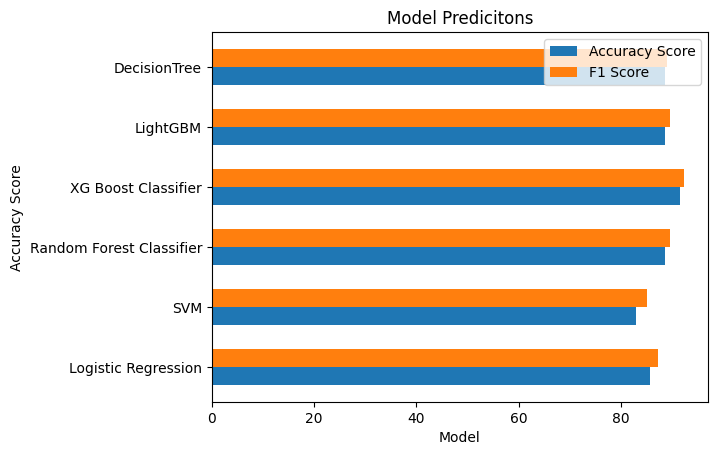

In [542]:
# Creating a bar graph to see which model performed well graphically by utilizing both accuracy_score and f1_score
import matplotlib.pyplot as plt
labels = list(accuracy_scores.keys())
accuracy_scores_list = list(accuracy_scores.values())
f1_scores_list = list(f1_scores.values())
height = 0.3
y = np.arange(len(labels))
fig, ax = plt.subplots()
ax.barh(y - height / 2, accuracy_scores_list, height, label="Accuracy Score")
ax.barh(y + height / 2, f1_scores_list, height, label="F1 Score")
ax.set_yticks(y)
ax.set_yticklabels(labels)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Predicitons")
plt.legend()
plt.show()

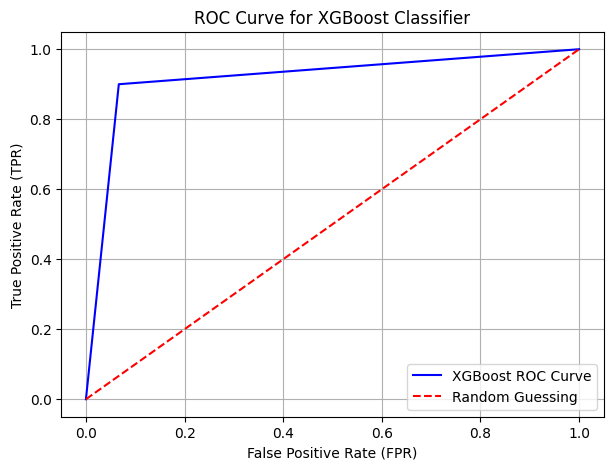

In [549]:
# By seeing this we can conclude that XG Boost Model is performing best comparing to the rest 
# Lets make a ROC curve for XG Boost Classifier and see the details
fpr, tpr = roc_curve_details['XG Boost Classifier']['fpr'], roc_curve_details['XG Boost Classifier']['tpr']
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label="XGBoost ROC Curve")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for XGBoost Classifier")
plt.legend()
plt.grid(True)
plt.show()